In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('data/raw/anime.csv')
data_rating=pd.read_csv('data/raw/rating.csv')

In [3]:
data_rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,355,-1


In [4]:
data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Их таблицы rating.csv каких-то полезных данных не получить, так как в anime.csv уже имеются колонки с кол-вом оценивших человек. А больше никкакой информации возможно влеяющей на рейтинг из нее не получить. Далее расмторим только таблицу anime.csv.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11433 entries, 0 to 11432
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  11433 non-null  int64  
 1   name      11433 non-null  object 
 2   genre     11375 non-null  object 
 3   type      11411 non-null  object 
 4   episodes  11433 non-null  object 
 5   rating    11223 non-null  float64
 6   members   11433 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 625.4+ KB


Проверим наличие пустых полей

In [6]:
data.isnull().sum()# кол-во пустых значений

anime_id      0
name          0
genre        58
type         22
episodes      0
rating      210
members       0
dtype: int64

Наибольшее количство пустых полей в столбце рейтинга, так как это столбец с величиной, которую и требуется предсказывать, данные строки можно только удалить из выборки. Удалим пустые поля и обмновим индексацию.

In [7]:
data = data.dropna()# удаление строк с пустыми значениями
data = data.reset_index(drop=True)# обновление индексации 

In [8]:
data.describe()

,anime_id,rating,members
count,11179.000000,11179.000000,11179.000000
mean,13592.852044,6.480651,18179.090348
std,11208.738642,1.018446,54062.501612
min,1.000000,1.670000,13.000000
25%,3404.000000,5.890000,229.000000
50%,9922.000000,6.570000,1553.000000
75%,23646.000000,7.180000,9592.000000
max,34519.000000,10.000000,896229.000000


Столбец с ID аниме вряд ли как-то влияет на рейтинг, поэтому его можно удлаить. И рассмотриеть столбец названия. Предположительно может быть влияние от длины названия.

In [9]:
# Удаляем столбец
data = data.drop(['anime_id'], axis=1)

In [10]:
# Создание столбца с длиной названия
data['name_len'] = data['name'].str.len()# Находим длину каждого названия 
data.head()

,name,genre,type,episodes,rating,members,name_len
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,14
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,32
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,8
3,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,11
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,13


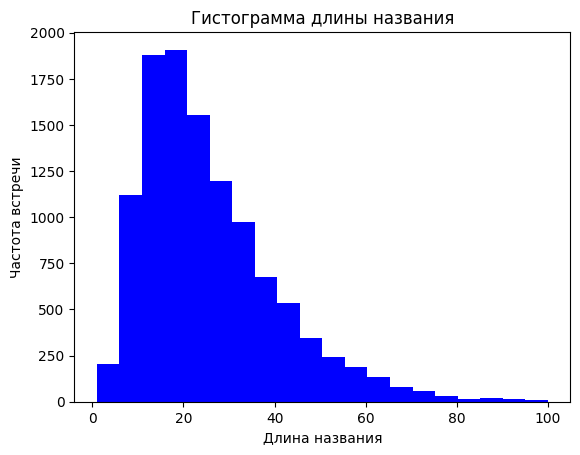

In [11]:
# Построение гистограммы 
plt.hist(data['name_len'], bins=20, color='blue')
plt.xlabel('Длина названия')
plt.ylabel('Частота встречи')
plt.title('Гистограмма длины названия')
plt.show()

In [12]:
# Находим уникальные длины названий
unique_name_len = list(set(data.name_len))
print(unique_name_len)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [13]:
# Определим средний рейтинг и встречаемость по длинам названий.
name_len_rating = []
name_len_encounter = []
for i in range(len(unique_name_len)):
    sum1 = 0.0;
    count = 0;
    for k in range(len(data.name_len)):
        if unique_name_len[i] == data.name_len[k]:
            sum1 = sum1 + data.rating[k]
            count = count + 1
    sum1 = sum1/count 
    name_len_rating.append(sum1)
    name_len_encounter.append(count)
name_lens = pd.DataFrame({'name_len': unique_name_len, 'name_len_rating': name_len_rating, 'name_len_encounter': name_len_encounter})   
# Сортируем типы аниме по возрастанию длины названия
name_lens_sorted = name_lens.sort_values(by='name_len')
print(name_lens_sorted)

    name_len  name_len_rating  name_len_encounter
0          1         7.406667                   3
1          2         6.185714                   7
2          3         5.510000                  28
3          4         6.049104                  67
4          5         6.111485                 101
..       ...              ...                 ...
95        96         7.180000                   2
96        97         7.290000                   1
97        98         6.915000                   2
98        99         6.540000                   1
99       100         7.003333                   6

[100 rows x 3 columns]


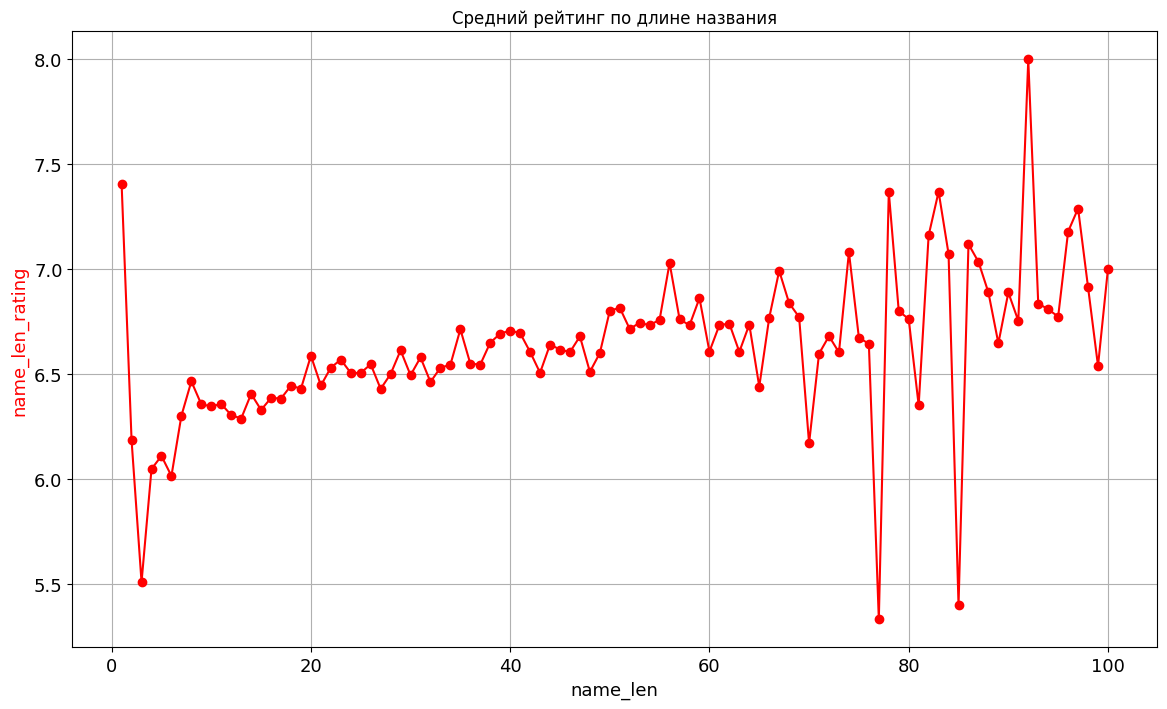

In [14]:
# Создаем график
fig, ax1 = plt.subplots(figsize=(14, 8))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Cредний рейтинг по длине названия')
# Строим линию
ax1.plot(name_lens_sorted['name_len'], name_lens_sorted['name_len_rating'], marker='o',color='r')
ax1.set_xlabel('name_len', fontsize=13)
ax1.set_ylabel('name_len_rating', color='r', fontsize=13)
ax1.grid(True)
plt.show()

Длину названия можно попробовать использовать введя разделения на части.(<10;10-20;20-40;50-60;60-70;70-100)

In [15]:
# Закодируем name_len
name_len_cod = []
for i in range(len(data.name_len)):
    if data.name_len[i]<=10:
        name_len_cod.append(0)
    if (data.name_len[i]>10)&(data.name_len[i]<=20):
        name_len_cod.append(1)
    if (data.name_len[i]>20)&(data.name_len[i]<=40):
        name_len_cod.append(2)
    if (data.name_len[i]>40)&(data.name_len[i]<=50):
        name_len_cod.append(3)
    if (data.name_len[i]>50)&(data.name_len[i]<=60):
        name_len_cod.append(4)
    if (data.name_len[i]>60)&(data.name_len[i]<=70):
        name_len_cod.append(5)
    if (data.name_len[i]>70)&(data.name_len[i]<=100):
        name_len_cod.append(6)
data['name_len_cod'] = name_len_cod
data.head() 

,name,genre,type,episodes,rating,members,name_len,name_len_cod
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,14,1
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,32,2
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,8,0
3,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,11,1
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,13,1


Также провреим есть ли популярные слова в названии и зависит ли от их использования рейтинг.

In [16]:
from collections import Counter
# Функция для разделения строки на слова
def split_into_words(text):
    letters = list(text)  # Преобразуем строку в массив букв
    current_word = ''     # Инициализируем пустую строку для текущего слова
    words = []            # Инициализируем список для хранения всех слов
    # Перебираем буквы в массиве
    for letter in letters:
        # Если буква не пробел, добавляем ее к текущему слову
        if (letter != ' ')&(letter != ' - ')&(letter != '@')&(letter != '"')&(letter != ';')&(letter != ':')&(letter != '!')&(letter != '?')&(letter != '(')&(letter != ')')&(letter != '[')&(letter != ']')&(letter != '.'):
            current_word += letter
        # Если буква пробел и текущее слово не пустое, добавляем его в список слов и сбрасываем текущее слово
        elif current_word:
            words.append(current_word.lower())  # Приводим слово к нижнему регистру перед добавлением в список
            current_word = ''
    # Если после последней буквы есть непустое текущее слово, добавляем его в список слов
    if current_word:
        words.append(current_word.lower())  # Приводим слово к нижнему регистру перед добавлением в список
    
    return words
# Создаем новый столбец, содержащий список слов для каждой строки
data['words_name'] = data['name'].apply(split_into_words)

# Применяем функцию к столбцу DataFrame и объединяем списки слов в один список
all_words = sum(data['words_name'], [])

# Приводим все слова к нижнему регистру перед подсчетом частоты встречаемости
all_words_lower = [word.lower() for word in all_words]

# Считаем частоту встречаемости каждого слова
word_counts = Counter(all_words_lower)

# Выбираем наиболее часто встречаемые слова
top_words = word_counts.most_common(100)

# Создаем DataFrame из наиболее часто встречаемых слов
top_words_df = pd.DataFrame(top_words, columns=['unique_words', 'encounter'])

print(top_words_df)
data.head()

   unique_words  encounter
0            no       3098
1           the        613
2            to        555
3         movie        427
4             -        288
..          ...        ...
95        piece         42
96         ball         42
97        ghost         41
98         toki         41
99         zero         41

[100 rows x 2 columns]


,name,genre,type,episodes,rating,members,name_len,name_len_cod,words_name
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,14,1,"[kimi, no, na, wa]"
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,32,2,"[fullmetal, alchemist, brotherhood]"
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,8,0,[gintama°]
3,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,11,1,"[steins, gate]"
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,13,1,[gintama&#039]


Определим средний рейтинг и кол-во для аниме со словами в названии из 100 популярных и без них.

In [17]:
words_rating = []
encounter = []
sum1 = 0.0;
sum2 = 0.0;
count1 = 0;
count2 = 0;
oldcount1 = 0;
for i in range(len(data.words_name)):
    for j in range(len(data.words_name[i])):
        for k in range(len(top_words_df.unique_words)):
            if top_words_df.unique_words[k] == data.words_name[i][j]:
                sum1 = sum1 + data.rating[i]
                count1 = count1 + 1
                break
        if count1 != oldcount1:
            break
    if count1 == oldcount1:
        sum2 = sum2 + data.rating[i]
        count2 = count2 + 1
    oldcount1 = count1
sum1 = sum1/count1
sum2 = sum2/count2
words_rating.append(sum1)
encounter.append(count1)
words_rating.append(sum2)
encounter.append(count2)
words_rating = pd.DataFrame({'words': ['ТОП-100 слов','Остальные'], 'words_rating': words_rating, 'encounter': encounter})   
words_rating.head()

,words,words_rating,encounter
0,ТОП-100 слов,6.568383,6622
1,Остальные,6.353164,4557


Разница в рейтинге не сильно заметна. Но также подготовим эти данные для проверки на таблице корреляции. Закодируем 1-есть слова в названии из топ-100, 0 - слов нет.

In [18]:
name_words_cod = []
count1 = 0;
for i in range(len(data.words_name)):
    for j in range(len(data.words_name[i])):
        for k in range(len(top_words_df.unique_words)):
            if top_words_df.unique_words[k] == data.words_name[i][j]:
                name_words_cod.append(1)
                count1 = count1 + 1
                break
        if count1 != oldcount1:
            break
    if count1 == oldcount1:
        name_words_cod.append(0)
    oldcount1 = count1
data['name_words_cod'] = name_words_cod
# Удаляем столбец
data = data.drop(['name','words_name'], axis=1)
data.head()

,genre,type,episodes,rating,members,name_len,name_len_cod,name_words_cod
0,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,14,1,1
1,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,32,2,0
2,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,8,0,0
3,"Sci-Fi, Thriller",TV,24,9.17,673572,11,1,0
4,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,13,1,0


Далее рассмотрим столбец жанра.

In [19]:
# Разделяем строки в столбце 'genre' на отдельные слова, образуем массивы слов
data['genre'] = data['genre'].str.split(', ')
data.head()

,genre,type,episodes,rating,members,name_len,name_len_cod,name_words_cod
0,"[Drama, Romance, School, Supernatural]",Movie,1,9.37,200630,14,1,1
1,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",TV,64,9.26,793665,32,2,0
2,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51,9.25,114262,8,0,0
3,"[Sci-Fi, Thriller]",TV,24,9.17,673572,11,1,0
4,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51,9.16,151266,13,1,0


In [20]:
# Объединяем все списки из столбца 'genre' в один список
all_words = [word for sublist in data['genre'] for word in sublist]

# Находим уникальные жанры
unique_words = list(set(all_words))

print(unique_words)
print("Кол-во жанров: ",len(unique_words)) 

['Martial Arts', 'Parody', 'Thriller', 'Shounen Ai', 'Ecchi', 'Magic', 'Seinen', 'Shoujo Ai', 'Romance', 'School', 'Shounen', 'Comedy', 'Sports', 'Super Power', 'Music', 'Mecha', 'Horror', 'Supernatural', 'Adventure', 'Police', 'Cars', 'Kids', 'Slice of Life', 'Fantasy', 'Military', 'Sci-Fi', 'Yuri', 'Vampire', 'Yaoi', 'Samurai', 'Shoujo', 'Demons', 'Space', 'Hentai', 'Mystery', 'Harem', 'Josei', 'Game', 'Historical', 'Dementia', 'Action', 'Drama', 'Psychological']
Кол-во жанров:  43


Определим средний рейтинг и встречаемость по всем жанрам.

In [21]:
genre_rating = []
encounter = []
for i in range(len(unique_words)):
    sum1 = 0.0;
    count = 0;
    for k in range(len(data.genre)):
        for j in range(len(data.genre[k])):
            if unique_words[i] == data.genre[k][j]:
                sum1 = sum1 + data.rating[k]
                count = count + 1
                break
    sum1 = sum1/count
    genre_rating.append(sum1)
    encounter.append(count)
genres = pd.DataFrame({'genre': unique_words, 'genre_rating': genre_rating, 'encounter': encounter})   
# Сортируем жанры по возрастанию рейтинга
genres_sorted = genres.sort_values(by='genre_rating')
print(genres_sorted)

            genre  genre_rating  encounter
39       Dementia      5.012877        219
14          Music      5.928411        768
26           Yuri      6.101795         39
21           Kids      6.123287       1500
33         Hentai      6.177270       1044
20           Cars      6.399545         66
28           Yaoi      6.414722         36
16         Horror      6.416905        336
1          Parody      6.510656        381
11         Comedy      6.626764       4283
15          Mecha      6.647087        865
32          Space      6.653750        352
23        Fantasy      6.663860       2101
4           Ecchi      6.668429        592
31         Demons      6.674238        269
25         Sci-Fi      6.692826       1900
18      Adventure      6.735227       2158
22  Slice of Life      6.743256       1118
38     Historical      6.747642        742
37           Game      6.768625        160
12         Sports      6.781918        490
40         Action      6.787882       2587
5          

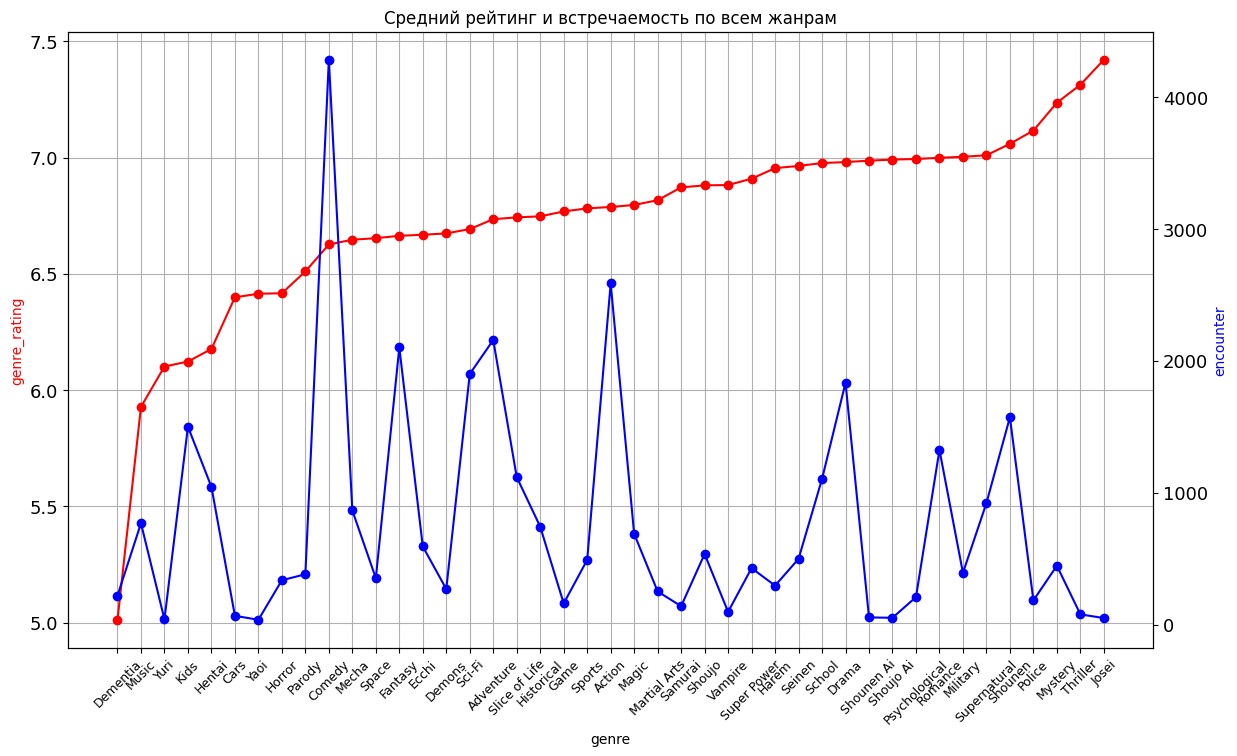

In [22]:
# Создаем фигуру и оси для двух линий на одном графике
fig, ax1 = plt.subplots(figsize=(14, 8))

plt.xticks(rotation=45)
plt.xticks(fontsize=9)
plt.yticks(fontsize=13)
plt.title('Cредний рейтинг и встречаемость по всем жанрам')
# Строим первую линию с левой осью y
ax1.plot(genres_sorted['genre'], genres_sorted['genre_rating'], marker='o',color='r')
ax1.set_xlabel('genre')
ax1.set_ylabel('genre_rating', color='r')

# Создаем вторую ось y с другим масштабом
ax2 = ax1.twinx()
plt.yticks(fontsize=13)
ax2.plot(genres_sorted['genre'], genres_sorted['encounter'], marker='o',color='b')
ax2.set_ylabel('encounter', color='b')
ax1.grid(True)

plt.show()

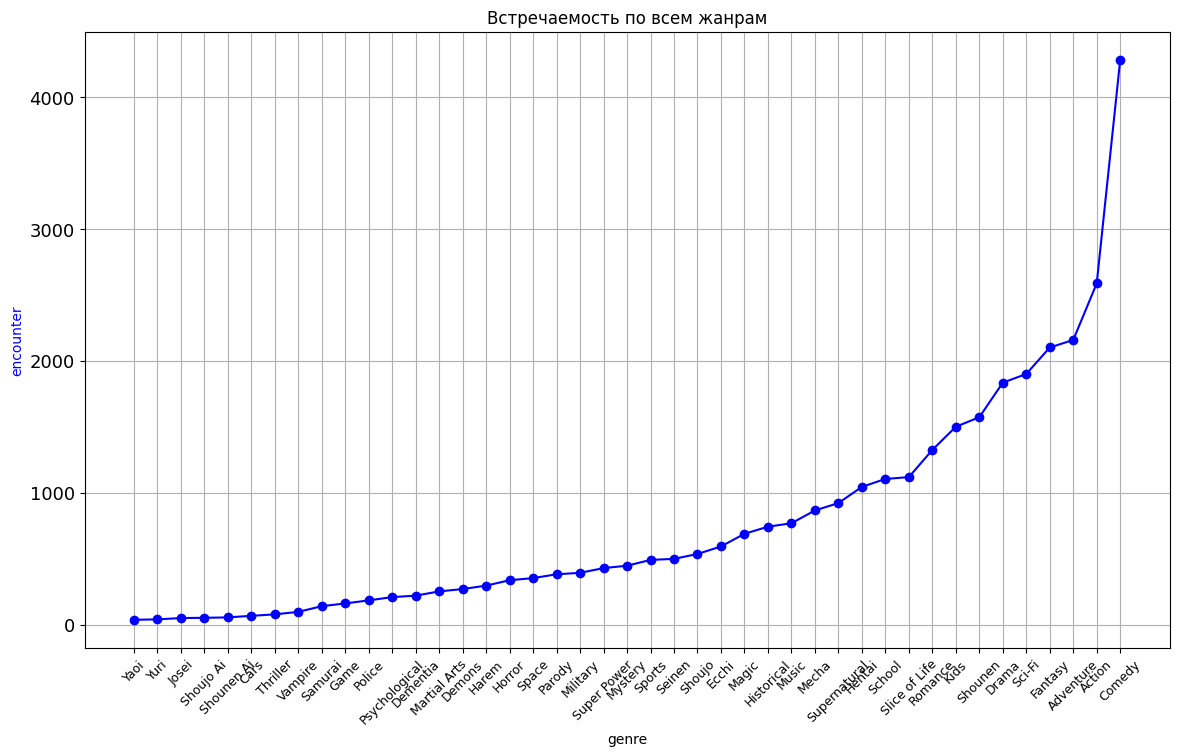

In [23]:
# Сортируем жанры по возрастанию встречаемости
genres_sorted_encounter = genres.sort_values(by='encounter')
# Создаем фигуру и оси для двух линий на одном графике
fig, ax1 = plt.subplots(figsize=(14, 8))

plt.xticks(rotation=45)
plt.xticks(fontsize=9)
plt.yticks(fontsize=13)
plt.title('Встречаемость по всем жанрам')
# Строим линию 
plt.yticks(fontsize=13)
ax1.plot(genres_sorted_encounter['genre'], genres_sorted_encounter['encounter'], marker='o',color='b')
ax1.set_ylabel('encounter', color='b')
ax1.set_xlabel('genre')
ax1.grid(True)

plt.show()

Из построенной зависимости среднего рейтинга и встречаемости по всем жанрам, можно сказать, что зависимость рейтинга от жанра есть, но с встречаемостью(популярностью жанра) зависимость не прослеживается. 

Рассмотрим некоторые популярные комбинации жанров. Также сразу закодируем наличие данных комбинаци по возрастанию рейтинга.

In [24]:
from tabulate import tabulate
genre_rating = []
encounter = []
genre_cod = []
sum1 = 0.0;sum2 = 0.0;sum3 = 0.0;sum4 = 0.0;sum5 = 0.0;sum6 = 0.0;sum7 = 0.0;sum8 = 0.0;sum9 = 0.0;
count1 = 0;count2 = 0;count3 = 0;count4 = 0;count5 = 0;count6 = 0;count7 = 0;count8 = 0;count9 = 0;
for i in range(len(data.genre)):
    Romance = 0;Drama = 0;Action = 0;Fantasy = 0;Psychological = 0;Thriller = 0;Sci_Fi = 0;Mecha = 0;Adventure = 0;Supernatural = 0;
    Comedy = 0;School = 0;Harem = 0;Ecchi = 0;Mystery = 0;Detective = 0;
    for j in range(len(data.genre[i])):
        if data.genre[i][j] == 'Romance':
            Romance = 1
        if data.genre[i][j] == 'Drama':
            Drama = 1
        if data.genre[i][j] == 'Action':
            Action = 1
        if data.genre[i][j] == 'Fantasy':
            Fantasy = 1
        if data.genre[i][j] == 'Psychological':
            Psychological = 1
        if data.genre[i][j] == 'Thriller':
            Thriller = 1
        if data.genre[i][j] == 'Sci-Fi':
            Sci_Fi = 1
        if data.genre[i][j] == 'Mecha':
            Mecha = 1
        if data.genre[i][j] == 'Adventure':
            Adventure = 1
        if data.genre[i][j] == 'Supernatural':
            Supernatural = 1
        if data.genre[i][j] == 'Comedy':
            Comedy = 1
        if data.genre[i][j] == 'School':
            School = 1
        if data.genre[i][j] == 'Harem':
            Harem = 1
        if data.genre[i][j] == 'Ecchi':
            Ecchi = 1
        if data.genre[i][j] == 'Mystery':
            Mystery = 1
        if data.genre[i][j] == 'Detective':
            Detective = 1
    if Romance&Drama:
        sum1 = sum1 + data.rating[i]
        count1 = count1 + 1
        genre_cod.append(6)
    elif Action&Fantasy:
        sum2 = sum2 + data.rating[i]
        count2 = count2 + 1  
        genre_cod.append(3)
    elif Psychological&Thriller:
        sum3 = sum3 + data.rating[i]
        count3 = count3 + 1    
        genre_cod.append(8)
    elif Sci_Fi&Mecha:
        sum4 = sum4 + data.rating[i]
        count4 = count4 + 1  
        genre_cod.append(1)
    elif Adventure&Supernatural:
        sum5 = sum5 + data.rating[i]
        count5 = count5 + 1  
        genre_cod.append(4)
    elif Comedy&Romance&School:
        sum6 = sum6 + data.rating[i]
        count6 = count6 + 1  
        genre_cod.append(5)
    elif Harem&Ecchi:
        sum7 = sum7 + data.rating[i]
        count7 = count7 + 1
        genre_cod.append(2)
    elif Mystery&Supernatural:
        sum8 = sum8 + data.rating[i]
        count8 = count8 + 1  
        genre_cod.append(7)
    else:
        sum9 = sum9 + data.rating[i]
        count9 = count9 + 1 
        genre_cod.append(0)
sum1 = sum1/count1;sum2 = sum2/count2;sum3 = sum3/count3;sum4 = sum4/count4;sum5 = sum5/count5;
sum6 = sum6/count6;
sum7 = sum7/count7;
sum8 = sum8/count8;
sum9 = sum9/count9;
genre_rating.append(sum1)
encounter.append(count1)
genre_rating.append(sum2)
encounter.append(count2)
genre_rating.append(sum3)
encounter.append(count3)
genre_rating.append(sum4)
encounter.append(count4)
genre_rating.append(sum5)
encounter.append(count5)
genre_rating.append(sum6)
encounter.append(count6)
genre_rating.append(sum7)
encounter.append(count7)
genre_rating.append(sum8)
encounter.append(count8)
genre_rating.append(sum9)
encounter.append(count9)
genres_rating = pd.DataFrame({'genres': ['Romance&Drama','Action&Fantasy','Psychological&Thriller','Sci-Fi&Mecha','Adventure&Supernatural', 
                                         'Comedy&Romance&School','Harem&Ecchi','Mystery&Supernatural','Остальные'], 
                             'genres_rating': genre_rating, 'encounter': encounter})   
genres_rating_sorted = genres_rating.sort_values(by='genres_rating')
genres_rating_sorted = genres_rating_sorted.reset_index(drop=True) # изменение индексации 
print(tabulate(genres_rating_sorted, headers='keys', tablefmt='grid'))
data['genre_cod'] = genre_cod
data.head()

+----+------------------------+-----------------+-------------+
|    | genres                 |   genres_rating |   encounter |
+====+========================+=================+=============+
|  0 | Остальные              |         6.35694 |        8942 |
+----+------------------------+-----------------+-------------+
|  1 | Sci-Fi&Mecha           |         6.71301 |         617 |
+----+------------------------+-----------------+-------------+
|  2 | Harem&Ecchi            |         6.86973 |          73 |
+----+------------------------+-----------------+-------------+
|  3 | Action&Fantasy         |         6.94849 |         602 |
+----+------------------------+-----------------+-------------+
|  4 | Adventure&Supernatural |         7.04893 |         131 |
+----+------------------------+-----------------+-------------+
|  5 | Comedy&Romance&School  |         7.12335 |         182 |
+----+------------------------+-----------------+-------------+
|  6 | Romance&Drama          |         

,genre,type,episodes,rating,members,name_len,name_len_cod,name_words_cod,genre_cod
0,"[Drama, Romance, School, Supernatural]",Movie,1,9.37,200630,14,1,1,6
1,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",TV,64,9.26,793665,32,2,0,3
2,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51,9.25,114262,8,0,0,0
3,"[Sci-Fi, Thriller]",TV,24,9.17,673572,11,1,0,0
4,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51,9.16,151266,13,1,0,0


Преобразуем столбец жанра для таблицы корреляции. Закодируем каждый жанр по возрастанию среднего рейтинга для него.

In [25]:
genres_sorted = genres_sorted.reset_index(drop=True) # изменение индексации жанров по возрастанию рейтинга
print(genres_sorted)

            genre  genre_rating  encounter
0        Dementia      5.012877        219
1           Music      5.928411        768
2            Yuri      6.101795         39
3            Kids      6.123287       1500
4          Hentai      6.177270       1044
5            Cars      6.399545         66
6            Yaoi      6.414722         36
7          Horror      6.416905        336
8          Parody      6.510656        381
9          Comedy      6.626764       4283
10          Mecha      6.647087        865
11          Space      6.653750        352
12        Fantasy      6.663860       2101
13          Ecchi      6.668429        592
14         Demons      6.674238        269
15         Sci-Fi      6.692826       1900
16      Adventure      6.735227       2158
17  Slice of Life      6.743256       1118
18     Historical      6.747642        742
19           Game      6.768625        160
20         Sports      6.781918        490
21         Action      6.787882       2587
22         

In [26]:
# Кодирование жанров по их индексу
for i in range(len(data.genre)):
    genre_code = []
    for k in range(len(data.genre[i])):
        for j in range(len(genres_sorted.genre)):
            if data.genre[i][k] == genres_sorted.genre[j]:
                genre_code.append(j)
                break
    data.loc[i,"genre"]  = [pd.Series(numbers) for numbers in genre_code]
data.head() 

,genre,type,episodes,rating,members,name_len,name_len_cod,name_words_cod,genre_cod
0,"[31, 35, 30, 37]",Movie,1,9.37,200630,14,1,1,6
1,"[21, 16, 31, 12, 22, 36, 38]",TV,64,9.26,793665,32,2,0,3
2,"[21, 9, 18, 8, 24, 15, 38]",TV,51,9.25,114262,8,0,0,0
3,"[15, 41]",TV,24,9.17,673572,11,1,0,0
4,"[21, 9, 18, 8, 24, 15, 38]",TV,51,9.16,151266,13,1,0,0


Для корреляции возьмем среднее значение массивов жанров.

In [27]:
# Создание столбца со средним значением
data['sr_genre'] = data['genre'].apply(lambda x: sum(x) / len(x)) 
# Удаляем столбец
data = data.drop(['genre'], axis=1)
data.head()

,type,episodes,rating,members,name_len,name_len_cod,name_words_cod,genre_cod,sr_genre
0,Movie,1,9.37,200630,14,1,1,6,33.250000
1,TV,64,9.26,793665,32,2,0,3,25.142857
2,TV,51,9.25,114262,8,0,0,0,19.000000
3,TV,24,9.17,673572,11,1,0,0,28.000000
4,TV,51,9.16,151266,13,1,0,0,19.000000


Далее расмотрим столбец типа аниме (зависимость рейтинга от типа).

In [28]:
# Находим уникальные типы аниме
unique_type = list(set(data['type']))
print(unique_type)

['ONA', 'Special', 'TV', 'Music', 'Movie', 'OVA']


In [29]:
# Определяем средний рейтинг и встречаемость по всем типам аниме
type_rating = []
type_encounter = []
for i in range(len(unique_type)):
    sum1 = 0.0;
    count = 0;
    for k in range(len(data.type)):
        if unique_type[i] == data.type[k]:
            sum1 = sum1 + data.rating[k]
            count = count + 1
    sum1 = sum1/count 
    type_rating.append(sum1)
    type_encounter.append(count)
types = pd.DataFrame({'type': unique_type, 'type_rating': type_rating, 'type_encounter': type_encounter})   
# Сортируем типы аниме по возрастанию рейтинга
types_sorted = types.sort_values(by='type_rating')
print(types_sorted)

      type  type_rating  type_encounter
3    Music     5.588300             447
0      ONA     5.663589             599
4    Movie     6.333278            2111
5      OVA     6.381960            3041
1  Special     6.527881            1567
2       TV     6.898202            3414


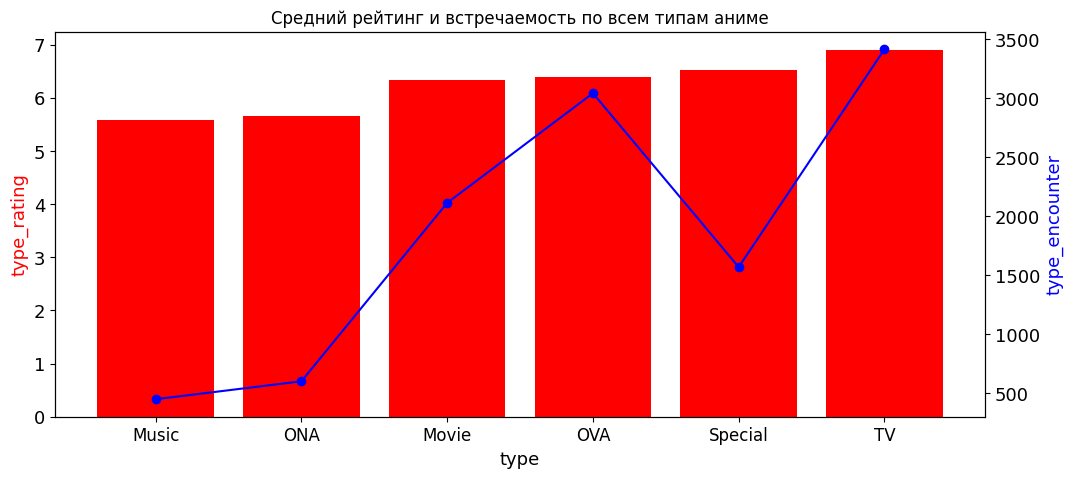

In [30]:
# Строим график
fig, ax1 = plt.subplots(figsize=(12, 5))

plt.xticks(fontsize=12)
plt.yticks(fontsize=13)
plt.title('Cредний рейтинг и встречаемость по всем типам аниме')
# Строим первую линию с левой осью y
ax1.bar(types_sorted['type'], types_sorted['type_rating'], color='r')
ax1.set_xlabel('type', fontsize=13)
ax1.set_ylabel('type_rating', color='r', fontsize=13)

# Создаем вторую ось y с другим масштабом
ax2 = ax1.twinx()
plt.yticks(fontsize=13)
ax2.plot(types_sorted['type'], types_sorted['type_encounter'], marker='o',color='b')
ax2.set_ylabel('type_encounter', color='b', fontsize=13)

plt.show()

Из построенной зависимости среднего рейтинга и встречаемости по всем типам аниме, можно сказать, что зависимость рейтинга от типа незначительная, но есть. 
По встречаемости(популярность типа аниме) зависимость есть, но тип Specisal выбивается.

Закодируем столбец с типом аниме. От 0 до 5 в зависмости от типа.

In [31]:
# Закодируем type
type_c = ['Music', 'ONA', 'Movie', 'OVA', 'Special', 'TV']
type_code = []
for i in range(len(data.type)):
    for j in range(len(type_c)):
        if data.type[i] == type_c[j]:
            type_code.append(j)
            break
data['type_code']= type_code
# Удаляем столбец
data = data.drop(['type'], axis=1)
data.head() 

,episodes,rating,members,name_len,name_len_cod,name_words_cod,genre_cod,sr_genre,type_code
0,1,9.37,200630,14,1,1,6,33.250000,2
1,64,9.26,793665,32,2,0,3,25.142857,5
2,51,9.25,114262,8,0,0,0,19.000000,5
3,24,9.17,673572,11,1,0,0,28.000000,5
4,51,9.16,151266,13,1,0,0,19.000000,5


Далее рассмотрим столбец кол-ва эпизодов.

In [32]:
# Находим уникальное количество серий
unique_episodes = list(set(data['episodes']))
print(unique_episodes)

['44', '27', '26', '203', '7', '330', '86', '72', '1', '41', '161', '192', '365', '283', '46', '76', '1306', '13', '90', '92', '1428', '70', '163', '58', '45', '99', '20', '224', '195', '47', '8', '15', '201', '175', '178', '145', '102', '125', '103', '34', '68', '50', '726', '237', '170', '191', '66', '36', '21', '85', '39', '143', '312', '60', '33', '115', '2', '156', '91', '56', '11', '180', '63', '291', '153', '42', '128', '75', '1471', '28', '276', '4', '109', '130', '124', '105', '199', '1274', '51', '137', '127', '296', '114', '38', '225', '6', '37', '79', '67', '526', '16', '373', '182', '1787', '43', '475', '305', '150', '25', '366', '220', '88', '54', '22', '84', '9', '358', '53', '108', '5', '167', '101', '200', '24', '260', '1006', '148', '151', '243', '263', '59', '61', '23', '17', '331', '172', '80', '55', '71', '510', '69', '78', '49', '12', '19', '140', '162', '117', '104', '73', '18', '30', '32', '62', '29', '31', '193', '100', '10', '64', '48', '98', '97', '773', 'Unk

Видим наличие "Unknown" (неизвестного кол-ва серий), что будет мешать в выборке, поэтому удалим строки с данным значением.

In [33]:
# Удаление строк, в которых в столбце 'episodes' встречается 'Unknown'
data = data.query('episodes != "Unknown"')
data = data.reset_index(drop=True) # обновление индексации 
data['episodes'] = data['episodes'].astype(int)# преобразование столбца в int
# Находим уникальное количество серий
unique_episodes = list(set(data['episodes']))
print(unique_episodes)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 84, 85, 86, 87, 88, 526, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 108, 109, 110, 112, 114, 115, 117, 119, 120, 124, 125, 127, 128, 130, 132, 136, 137, 140, 142, 143, 145, 147, 148, 150, 151, 153, 154, 156, 161, 162, 163, 164, 167, 170, 172, 175, 178, 180, 182, 694, 191, 192, 193, 1565, 195, 199, 200, 201, 203, 726, 220, 224, 225, 237, 240, 243, 1274, 1787, 260, 773, 263, 276, 1306, 283, 291, 296, 305, 312, 330, 331, 358, 365, 366, 373, 1428, 1471, 475, 1006, 510]


Определяем средний рейтинг и встречаемость по всем количествам эпизодов.

In [34]:
episodes_rating = []
episodes_encounter = []
for i in range(len(unique_episodes)):
    sum1 = 0.0;
    count = 0;
    for k in range(len(data.episodes)):
        if unique_episodes[i] == data.episodes[k]:
            sum1 = sum1 + data.rating[k]
            count = count + 1
    sum1 = sum1/count 
    episodes_rating.append(sum1)
    episodes_encounter.append(count)
episodess = pd.DataFrame({'episodes': unique_episodes, 'episodes_rating': episodes_rating, 'episodes_encounter': episodes_encounter})   
# Сортируем типы аниме по возрастанию рейтинга
episodes_sorted = episodess.sort_values(by='episodes')
print(episodes_sorted)

     episodes  episodes_rating  episodes_encounter
0           1         6.225150                5186
1           2         6.352510                 992
2           3         6.408803                 468
3           4         6.536634                 306
4           5         6.334245                 106
..        ...              ...                 ...
163      1306         6.430000                   1
175      1428         6.050000                   1
176      1471         6.480000                   1
144      1565         5.560000                   1
158      1787         7.760000                   1

[180 rows x 3 columns]


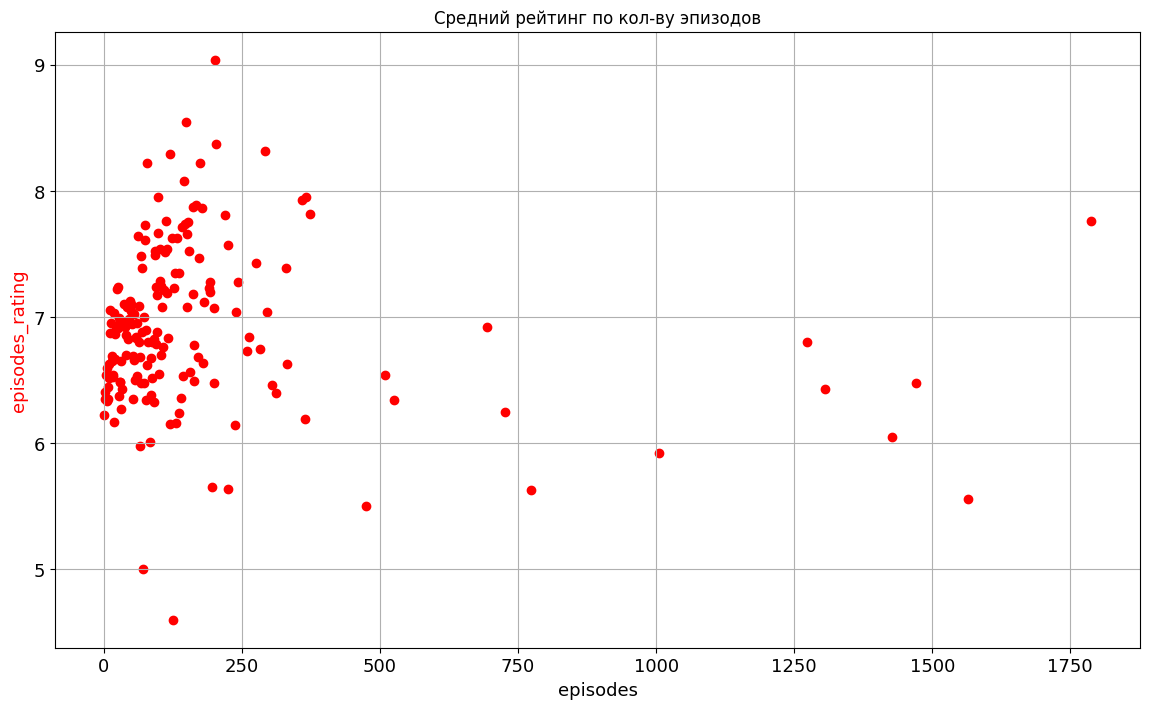

In [35]:
# Создаем график
fig, ax1 = plt.subplots(figsize=(14, 8))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Cредний рейтинг по кол-ву эпизодов')
# Строим линию
ax1.scatter(episodes_sorted['episodes'], episodes_sorted['episodes_rating'], marker='o',color='r')
ax1.set_xlabel('episodes', fontsize=13)
ax1.set_ylabel('episodes_rating', color='r', fontsize=13)
ax1.grid(True)
plt.show()

Четкой зависимости рейтинга от количества эпизодов не наблюдается, можно попробовать использовать ее разделив на 2 части <300 и больше.

In [36]:
episodes_cod = []
for i in range(len(data.episodes)):
    if data.episodes[i] <300:
        episodes_cod.append(0)
    else:
        episodes_cod.append(1)     
data['episodes_cod'] = episodes_cod
data.head()

,episodes,rating,members,name_len,name_len_cod,name_words_cod,genre_cod,sr_genre,type_code,episodes_cod
0,1,9.37,200630,14,1,1,6,33.250000,2,0
1,64,9.26,793665,32,2,0,3,25.142857,5,0
2,51,9.25,114262,8,0,0,0,19.000000,5,0
3,24,9.17,673572,11,1,0,0,28.000000,5,0
4,51,9.16,151266,13,1,0,0,19.000000,5,0


Далее рассматриваем столбец с кол-вом челвоек, поставивших оценку. 

In [37]:
# Сортируем рейтинг по возрастанию человек
members_sorted = data.sort_values(by='members')
members_sorted.head()

,episodes,rating,members,name_len,name_len_cod,name_words_cod,genre_cod,sr_genre,type_code,episodes_cod
9567,1,10.00,13,39,2,1,0,8.5,2,0
7733,1,6.00,17,35,2,0,0,9.0,3,0
7933,1,6.00,20,36,2,1,0,18.0,3,0
8891,1,7.33,20,22,2,1,0,18.0,3,0
8984,13,8.00,20,29,2,1,0,10.0,5,0


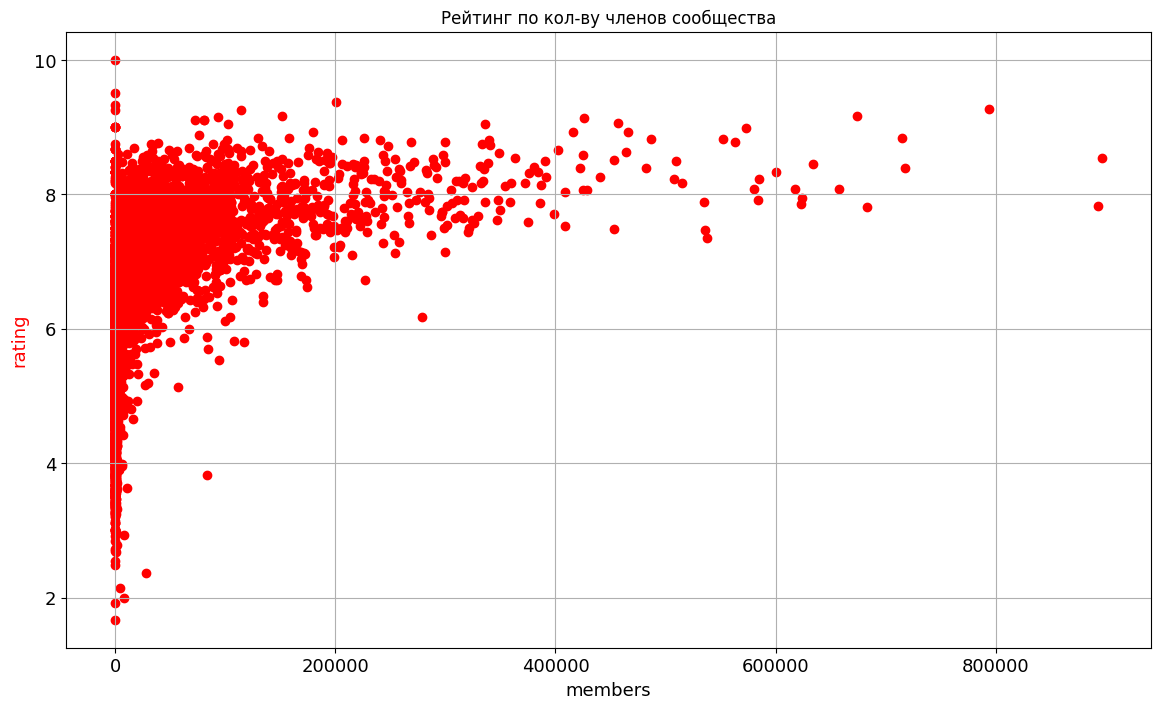

In [38]:
# Создаем график
fig, ax1 = plt.subplots(figsize=(14, 8))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Рейтинг по кол-ву членов сообщества')
# Строим линию 
ax1.scatter(members_sorted['members'], members_sorted['rating'], marker='o',color='r')
ax1.set_xlabel('members', fontsize=13)
ax1.set_ylabel('rating', color='r', fontsize=13)
ax1.grid(True)
plt.show()

Рейтинг достаточно сильно колебается, но можно сказать, что при members > 200000 колебания уменьшаются и средний рейтинг становится больше, примерно 8. И некоторая последовательная зависисомть есть.

Далее построим таблицу корреляции.

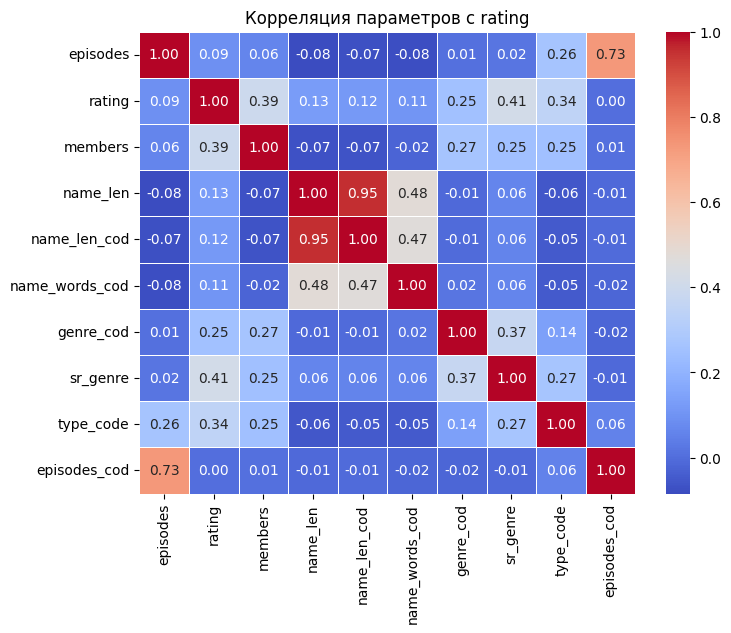

In [39]:
# Создание корреляционной матрицы
corr_matrix = data.corr()
# Создание тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляция параметров с rating')
plt.show()

Из таблицы можно сказать, что members, sr_genre имеют наибольшую корреляцию с рейтингом, их точно стоит оставить. Тип аниме имеет малую корреляцию, но его бы я также оставил. Корреляция при кодировании количества эпизодов уменьшилась до 0. Также корреляция уменьшилась при кодировании длины названия. 

Построим график рейтинга от среднего значения жанра, так как данная зависмость показала хорошую корреляцию.

In [40]:
# Сортируем рейтинг по возрастанию Среднее_genre
genre_sorted = data.sort_values(by='sr_genre')
genre_sorted.head()

,episodes,rating,members,name_len,name_len_cod,name_words_cod,genre_cod,sr_genre,type_code,episodes_cod
7367,1,4.40,139,3,0,0,0,0.0,2,0
7339,1,4.56,109,8,0,0,0,0.0,1,0
7034,1,5.26,448,36,2,1,0,0.0,2,0
7338,1,4.56,369,21,2,0,0,0.0,4,0
7026,1,5.27,130,6,0,0,0,0.0,2,0


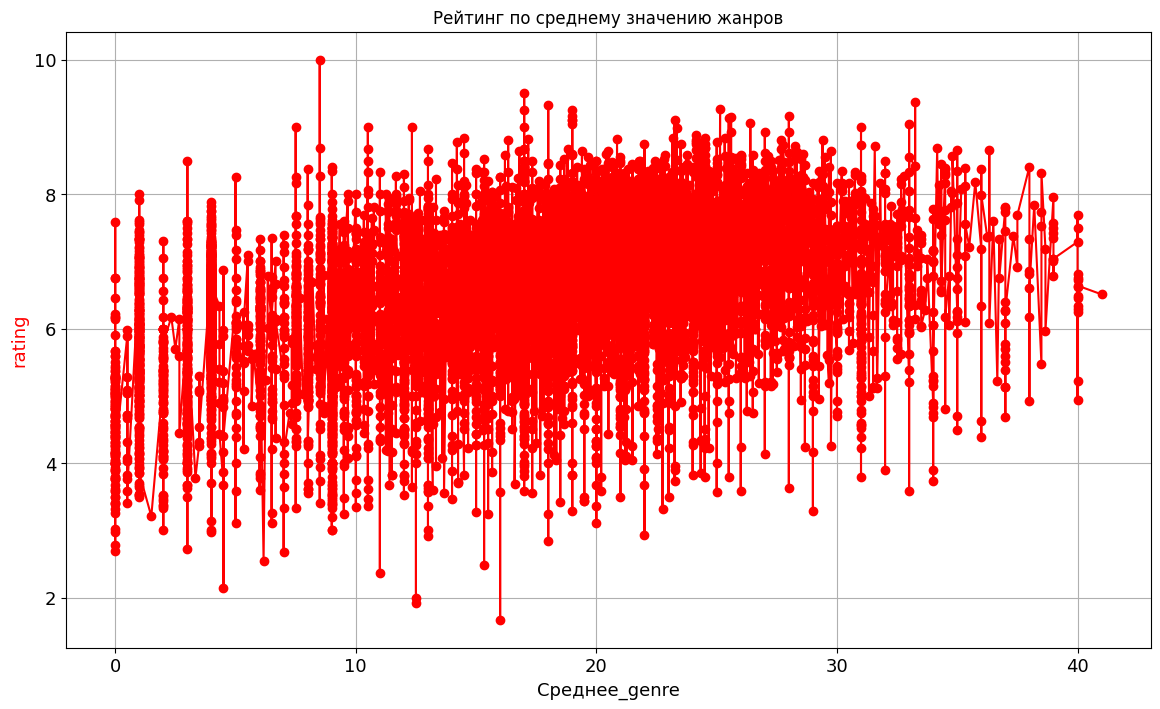

In [41]:
# Создаем фигуру и оси
fig, ax1 = plt.subplots(figsize=(14, 8))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Рейтинг по среднему значению жанров')
# Строим первую линию с левой осью y
ax1.plot(genre_sorted['sr_genre'], genre_sorted['rating'], marker='o',color='r')
ax1.set_xlabel('Среднее_genre', fontsize=13)
ax1.set_ylabel('rating', color='r', fontsize=13)
ax1.grid(True)
plt.show()

График получился не очень показательным.

In [42]:
# Находим уникальные значения sr_genre
unique_sr_genre = list(set(data['sr_genre']))
print(unique_sr_genre)

[0.0, 1.0, 0.5, 3.0, 4.5, 5.0, 6.5, 7.0, 8.5, 8.0, 9.0, 11.666666666666666, 12.0, 13.0, 14.5, 14.2, 16.333333333333332, 17.166666666666668, 14.0, 19.0, 20.857142857142858, 20.5, 19.4, 23.25, 24.333333333333332, 23.333333333333332, 23.166666666666668, 26.0, 26.5, 27.75, 27.142857142857142, 27.6, 27.25, 28.25, 29.75, 26.4, 27.0, 28.0, 33.25, 33.0, 31.0, 34.166666666666664, 35.0, 36.333333333333336, 38.0, 36.0, 38.5, 39.0, 9.5, 40.0, 41.0, 10.5, 10.75, 10.0, 9.75, 10.25, 11.0, 11.25, 11.5, 11.75, 2.0, 12.75, 12.25, 12.5, 2.5, 13.25, 13.5, 13.75, 13.875, 14.25, 14.75, 15.0, 15.25, 15.5, 15.75, 16.0, 16.75, 16.25, 16.5, 3.5, 17.0, 17.875, 17.25, 17.5, 17.75, 18.0, 18.75, 18.25, 18.5, 18.125, 19.75, 19.5, 19.25, 19.125, 19.625, 20.0, 20.25, 20.75, 20.125, 20.625, 21.25, 21.375, 21.0, 21.5, 21.75, 22.25, 22.625, 22.5, 22.75, 22.0, 23.375, 23.5, 23.75, 23.125, 23.0, 24.5, 24.25, 24.0, 24.75, 24.625, 25.5, 25.125, 25.0, 25.75, 25.25, 26.75, 26.25, 5.5, 25.875, 5.75, 27.5, 28.5, 28.75, 28.375, 2

In [43]:
sr_genre_rating = []
sr_genre_encounter = []
for i in range(len(unique_sr_genre)):
    sum1 = 0.0;
    count = 0;
    for k in range(len(data.sr_genre)):
        if unique_sr_genre[i] == data.sr_genre[k]:
            sum1 = sum1 + data.rating[k]
            count = count + 1
    sum1 = sum1/count 
    sr_genre_rating.append(sum1)
    sr_genre_encounter.append(count)
sr_genres = pd.DataFrame({'sr_genress': unique_sr_genre, 'sr_genre_rating': sr_genre_rating, 'sr_genre_encounter': sr_genre_encounter})   
# Сортируем рейтинг по возрастанию sr_genress 
sr_genres_sorted = sr_genres.sort_values(by='sr_genress')
print(sr_genres_sorted)

     sr_genress  sr_genre_rating  sr_genre_encounter
0      0.000000         4.629297                 128
2      0.500000         4.589375                  16
1      1.000000         5.762747                 273
147    1.500000         3.210000                   1
60     2.000000         5.028690                  84
..          ...              ...                 ...
46    38.500000         7.265000                   4
237   38.666667         6.580000                   2
47    39.000000         7.295556                   9
49    40.000000         6.532000                  15
50    41.000000         6.510000                   1

[445 rows x 3 columns]


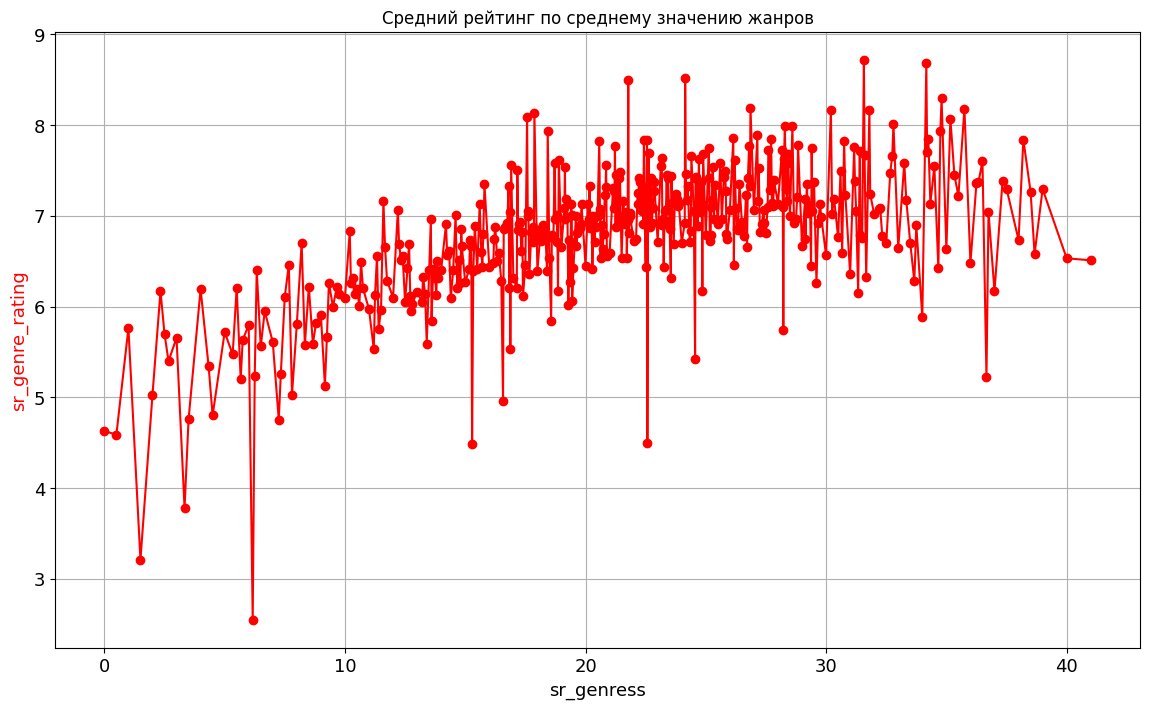

In [44]:
# Создаем график
fig, ax1 = plt.subplots(figsize=(14, 8))
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Cредний рейтинг по среднему значению жанров')
# Строим линию
ax1.plot(sr_genres_sorted['sr_genress'], sr_genres_sorted['sr_genre_rating'], marker='o',color='r')
ax1.set_xlabel('sr_genress', fontsize=13)
ax1.set_ylabel('sr_genre_rating', color='r', fontsize=13)
ax1.grid(True)
plt.show()

Теперь график более показательный, по которому видно, что зависимость прослеживается, как и показала таблица.